In [1]:
import os,sys,pandas

import matplotlib,matplotlib.pyplot
matplotlib.rcParams.update({'font.size':18,'font.family':'Arial','xtick.labelsize':14,'ytick.labelsize':14,'axes.labelsize':18})
matplotlib.rcParams['pdf.fonttype']=42

# 1. User defined variables

In [2]:
positions_file='/Users/adrianlopezgarciadelomana/gd/tmp/positions.PCA.rld_E.csv'
results_file='/Users/adrianlopezgarciadelomana/gd/tmp/positions.PCA.rld_E.pdf'

# 2. Read data

In [3]:
df=pandas.read_csv(positions_file,sep=',',index_col=0)
print(df.shape)
df.head()

(6, 5)


,PC1,PC2,group,condition,name
HMDM.1,-53.796673,-36.684832,human,human,HMDM.1
HMDM.2,-49.816541,-32.402495,human,human,HMDM.2
THP1.1,83.437015,-4.018521,thp,thp,THP1.1
THP1.2,83.325583,-8.213097,thp,thp,THP1.2
iMac.1,-30.176339,40.506792,imac,imac,iMac.1


In [4]:
pc1explained=75
pc2explained=20

# 3. Plot data

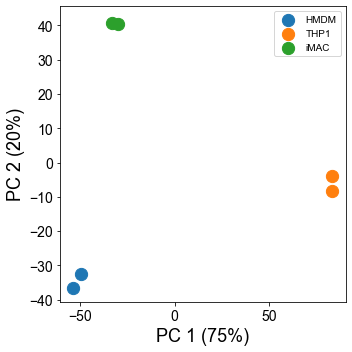

In [5]:
fig = matplotlib.pyplot.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('PC 1 ({:.0f}%)'.format(pc1explained,fontsize=16))
ax.set_ylabel('PC 2 ({:.0f}%)'.format(pc2explained,fontsize=16))

ax.scatter(df.iloc[0:2,0],df.iloc[0:2,1],s=150,c='#1f77b4',label='HMDM')
ax.scatter(df.iloc[2:4,0],df.iloc[2:4,1],s=150,c='#ff7f0e',label='THP1')
ax.scatter(df.iloc[4:6,0],df.iloc[4:6,1],s=150,c='#2ca02c',label='iMAC')

matplotlib.pyplot.legend()
matplotlib.pyplot.tight_layout()

matplotlib.pyplot.savefig(results_file)